In [ ]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [ ]:
# Untuk menampilkan seluruh kolom

pd.set_option('max_columns', None)

In [ ]:
# Import dataframe

df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
# Cek dataframe

df_train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [ ]:
# Cek dataframe

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Cek ukuran df_train

df_train.shape

(1460, 81)

In [ ]:
# Cek ukuran df_test

df_test.shape

(1459, 80)

# **Missing Values Checking**

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Karena ada beberapa kolom yang memiliki lebih dari 80% missing values dan kolom yang kurang penting (Id), maka kolom tersebut di-drop dari df_train dan df_test

In [ ]:
df_train = df_train.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
df_test = df_test.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal


Karena masih ada kolom dengan missing values, nilai-nilai yang hilang akan diisi dengan median untuk tipe data integer & float, dan diisi dengan modus (max value counts) untuk tipe data kategorik (object)

In [ ]:
numeric_train = [column for column in df_train.select_dtypes(["int", "float"])]
categoric_train = [column for column in df_train.select_dtypes(exclude = ["int", "float"])]

for col in numeric_train:
    df_train[col].fillna(df_train[col].median(), inplace = True)
        
for col in categoric_train:
    df_train[col].fillna(df_train[col].value_counts().index[0], inplace = True)

df_train.isna().sum().sum()

0

In [ ]:
numeric_test = [column for column in df_test.select_dtypes(["int", "float"])]
categoric_test = [column for column in df_test.select_dtypes(exclude = ["int", "float"])]

for col in numeric_test:
    df_test[col].fillna(df_test[col].median(), inplace = True)
        
for col in categoric_test:
    df_test[col].fillna(df_test[col].value_counts().index[0], inplace = True)

df_test.isna().sum().sum()

0

# **Explanatory Data Analysis (EDA)**

In [ ]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


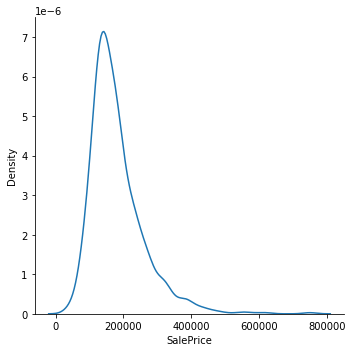

In [ ]:
sns.displot(df_train, x="SalePrice", kind = "kde")

Berdasarkan gambar di atas, terlihat bahwa harga rumah memiliki *positive skewness* atau miring ke kanan. Terlihat bahwa rata-rata harga rumah berkisar di harga 200000.

Distribusi ini terlihat wajar untuk harga rumah, karena terlihat bahwa semakin tinggi harga rumah, semakin eksklusif juga unit yang dijual.

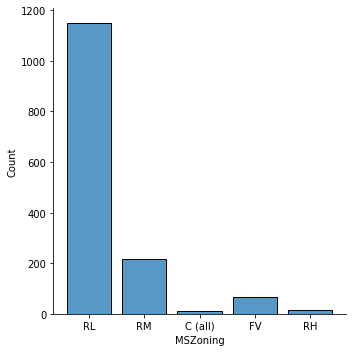

In [ ]:
sns.displot(df_train, x="MSZoning", shrink = .8)

Berdasarkan gambar di atas, terlihat bahwa unit rumah yang dijual paling banyak berada pada klasifikasi RL atau "Residential Low Density" yang merupakan kawasan rumah dengan kepadatan rendah, yang biasanya ditinggali oleh 1-2 kepala keluarga dalam satu rumah. 

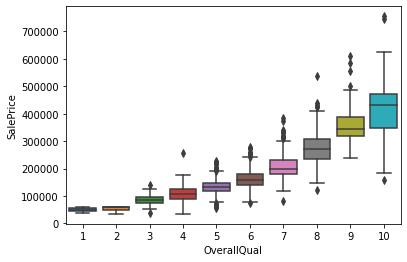

In [ ]:
sns.boxplot(x="OverallQual", y="SalePrice", data=df_train)

Berdasarkan gambar di atas, terlihat bahwa semakin bagus kualitas material dan finishing dari sebuah rumah, semakin tinggi juga range harga jualnya. Namun tidak memungkiri juga bahwa ada rumah yang "overpriced" dan ada yang "underpriced" di setiap masing-masing kategori kualitas. 

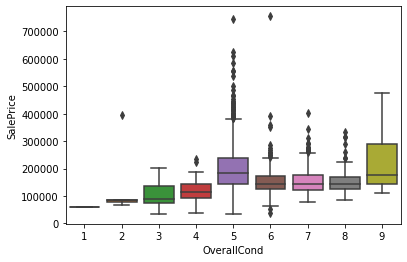

In [ ]:
sns.boxplot(x="OverallCond", y="SalePrice", data=df_train)

Dari sini, terlihat bahwa tingginya harga rumah belum tentu menjamin kondisi rumah tersebut (baik/buruk). Banyak harga rumah tinggi (di atas 400000) yang justru memiliki kondisi standar atau rata-rata (bernilai 5).

Terlihat juga bahwa harga rumah pada harga di atas 100000 sampai dengan 300000 yang justru memiliki kondisi yang bagus (bernilai 9).

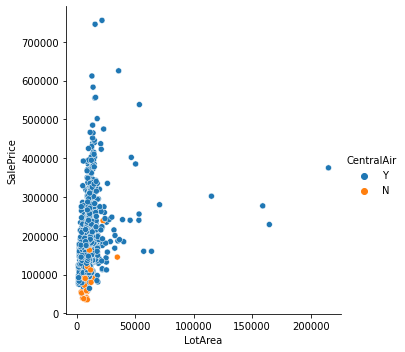

In [ ]:
sns.relplot(x="LotArea", y="SalePrice", hue="CentralAir", data=df_train);

Berdasarkan grafik di atas, terlihat bahwa hampir keseluruhan unit rumah yang dijual memiliki AC sentral (Central Air Conditioning).

Yang tidak memiliki AC sentral adalah rumah yang memiliki harga cenderung murah dengan luas yang kecil. Tetapi, masih lebih banyak unit rumah yang dijual yang memiliki AC sentral dengan kondisi luas dan harga yang sama. 

Kemudian, terlihat juga dari grafik bahwa luas bangunan tidak memiliki hubungan yang kuat dengan harga jual rumah. Terlihat bahwa banyak luas bangunan di bawah 50000 ft2 dengan harga jual yang berbeda-beda.

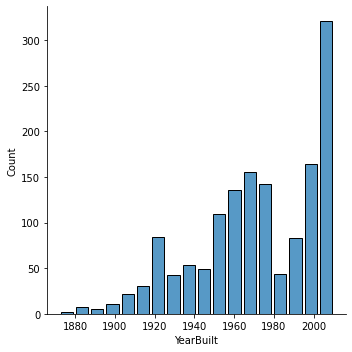

In [ ]:
sns.displot(df_train, x="YearBuilt", shrink = .8)

Dari grafik di atas, terlihat bahwa unit rumah yang dijual paling banyak dibangun pada tahun 2000-an.

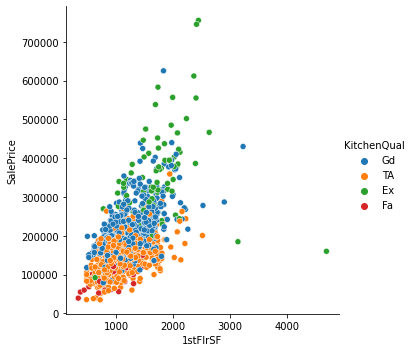

In [ ]:
sns.relplot(x="1stFlrSF", y="SalePrice", hue = "KitchenQual", data=df_train)

Dari grafik di atas, terlihat bahwa ada hubungan yang positif antara harga jual rumah dengan luas rumah pada lantai satu. 

Kemudian, terlihat juga bahwa kualitas dapur dapat mempengaruhi harga rumah, karena semakin bagus kualitasnya, maka semakin tinggi juga harganya. Selain itu, dari grafik, kualitas dapur juga terlihat dipengaruhi oleh luas dari lantai satu rumah tersebut. 

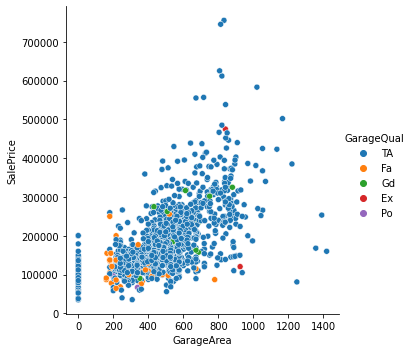

In [ ]:
sns.relplot(x="GarageArea", y="SalePrice", hue = "GarageQual", data=df_train)

Dari grafik, terlihat bahwa banyak rumah dengan garasi yang memiliki kualitas standar atau biasa-biasa saja. Terlihat juga bahwa kualitas garasi tidak dipengaruhi oleh luas garasi. Dari grafik, terlihat bahwa luas garasi dengan harga rumah memiliki hubungan yang positif. 

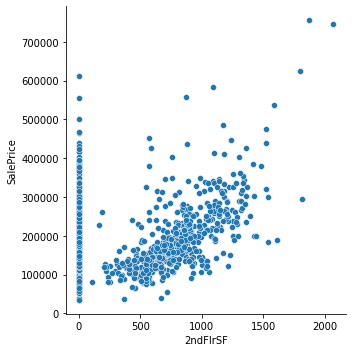

In [ ]:
sns.relplot(x="2ndFlrSF", y="SalePrice", data=df_train)

Dari grafik, terlihat bahwa rumah yang memiliki lantai dua dengan luas yang besar, semakin tinggi juga harganya.

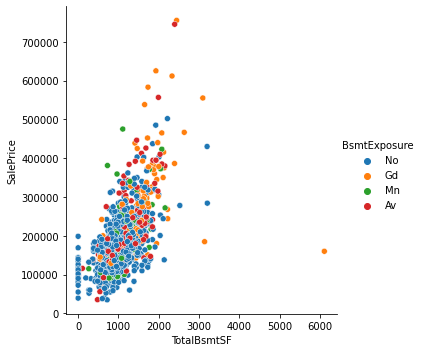

In [ ]:
sns.relplot(x="TotalBsmtSF", y="SalePrice", hue = "BsmtExposure", data=df_train)

Dari grafik di atas, terlihat bahwa semakin bagus exposure dari sebuah basement, maka semakin tinggi juga harga jualnya. 

Terlihat juga dari grafik bahwa ada hubungan yang positif antara luas total basement rumah dengan harga jualnya.

# **Choosing Variables for The Model**

**For Train Dataframe (df_train)**

In [ ]:
# Numerical Data

# Check correlation between SalePrice and other variables, with absolute value |x|
train_correlation = df_train.corr().abs()

# Sort the correlation from the highest value
train_correlation = train_correlation.sort_values('SalePrice', ascending = False)
train_correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,0.084284,0.334771,0.263843,0.790982,0.077856,0.522897,0.507101,0.472614,0.386420,0.011378,0.214479,0.613581,0.605852,0.319334,0.025606,0.708624,0.227122,0.016844,0.560664,0.284108,0.168213,0.135907,0.533723,0.466929,0.466754,0.640409,0.623431,0.324413,0.315856,0.128578,0.044584,0.111447,0.092404,0.021190,0.046432,0.028923,1.000000
OverallQual,0.032628,0.234812,0.105806,1.000000,0.091932,0.572323,0.550684,0.407252,0.239666,0.059119,0.308159,0.537808,0.476224,0.295493,0.030429,0.593007,0.111098,0.040150,0.550600,0.273458,0.101676,0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,0.113937,0.030371,0.064886,0.065166,0.031406,0.070815,0.027347,0.790982
GrLivArea,0.074853,0.368007,0.263116,0.593007,0.079686,0.199010,0.287389,0.388052,0.208171,0.009640,0.240257,0.454868,0.566024,0.687501,0.134683,1.000000,0.034836,0.018918,0.630012,0.415772,0.521270,0.100063,0.825489,0.461679,0.219801,0.467247,0.468997,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,0.002416,0.050240,0.036526,0.708624
GarageCars,0.040110,0.269539,0.154871,0.600671,0.185758,0.537850,0.420622,0.361945,0.224054,0.038264,0.214175,0.434585,0.439317,0.183926,0.094480,0.467247,0.131881,0.020891,0.469672,0.219178,0.086106,0.050634,0.362289,0.300789,0.474313,1.000000,0.882475,0.226342,0.213569,0.151434,0.035765,0.050494,0.020934,0.043080,0.040522,0.039117,0.640409
GarageArea,0.098672,0.323511,0.180403,0.562022,0.151521,0.478954,0.371600,0.370884,0.296970,0.018227,0.183303,0.486665,0.489782,0.138347,0.067601,0.468997,0.179189,0.024536,0.405656,0.163549,0.065253,0.064433,0.337822,0.269141,0.468804,0.882475,1.000000,0.224666,0.241435,0.121777,0.035087,0.051412,0.061047,0.027400,0.027974,0.027378,0.623431
TotalBsmtSF,0.238518,0.363472,0.260833,0.537808,0.171098,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,0.174512,0.033245,0.454868,0.307351,0.000315,0.323722,0.048804,0.050450,0.068901,0.285573,0.339519,0.309386,0.434585,0.486665,0.232019,0.247264,0.095478,0.037384,0.084489,0.126053,0.018479,0.013196,0.014969,0.613581
1stFlrSF,0.251758,0.413773,0.299475,0.476224,0.144203,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,0.202646,0.014241,0.566024,0.244671,0.001956,0.380637,0.119916,0.127401,0.068101,0.409516,0.410531,0.224897,0.439317,0.489782,0.235459,0.211671,0.065292,0.056104,0.088758,0.131525,0.021096,0.031372,0.013604,0.605852
FullBath,0.131608,0.180534,0.126031,0.550600,0.194149,0.468271,0.439046,0.272999,0.058543,0.076444,0.288886,0.323722,0.380637,0.421378,0.000710,0.630012,0.064512,0.054536,1.000000,0.136381,0.363252,0.133115,0.554784,0.243671,0.466809,0.469672,0.405656,0.187703,0.259977,0.115093,0.035353,0.008106,0.049604,0.014290,0.055872,0.019669,0.560664
TotRmsAbvGrd,0.040380,0.320518,0.190015,0.427452,0.057583,0.095589,0.191740,0.279568,0.044316,0.035227,0.250647,0.285573,0.409516,0.616423,0.131185,0.825489,0.053275,0.023836,0.554784,0.343415,0.676620,0.256045,1.000000,0.326114,0.139519,0.362289,0.337822,0.165984,0.234192,0.004151,0.006683,0.059383,0.083757,0.024763,0.036907,0.034516,0.533723
YearBuilt,0.027850,0.116685,0.014228,0.572323,0.375983,1.000000,0.592855,0.311600,0.249503,0.049107,0.149040,0.391452,0.281986,0.010308,0.183784,0.199010,0.187599,0.038162,0.468271,0.242656,0.070651,0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,0.387268,0.031355,0.050364,0.004950,0.034383,0.012398,0.013618,0.522897


In [ ]:
# Pick numerical variables with correlation to SalePrice is more than 0.5

high_correlation = train_correlation.index[abs(train_correlation["SalePrice"]) > 0.5]
high_correlation

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

In [ ]:
df_train[high_correlation].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


In [ ]:
numeric = df_train[high_correlation]

In [ ]:
# Categorical Data

categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categoric = df_train[categorical_features]

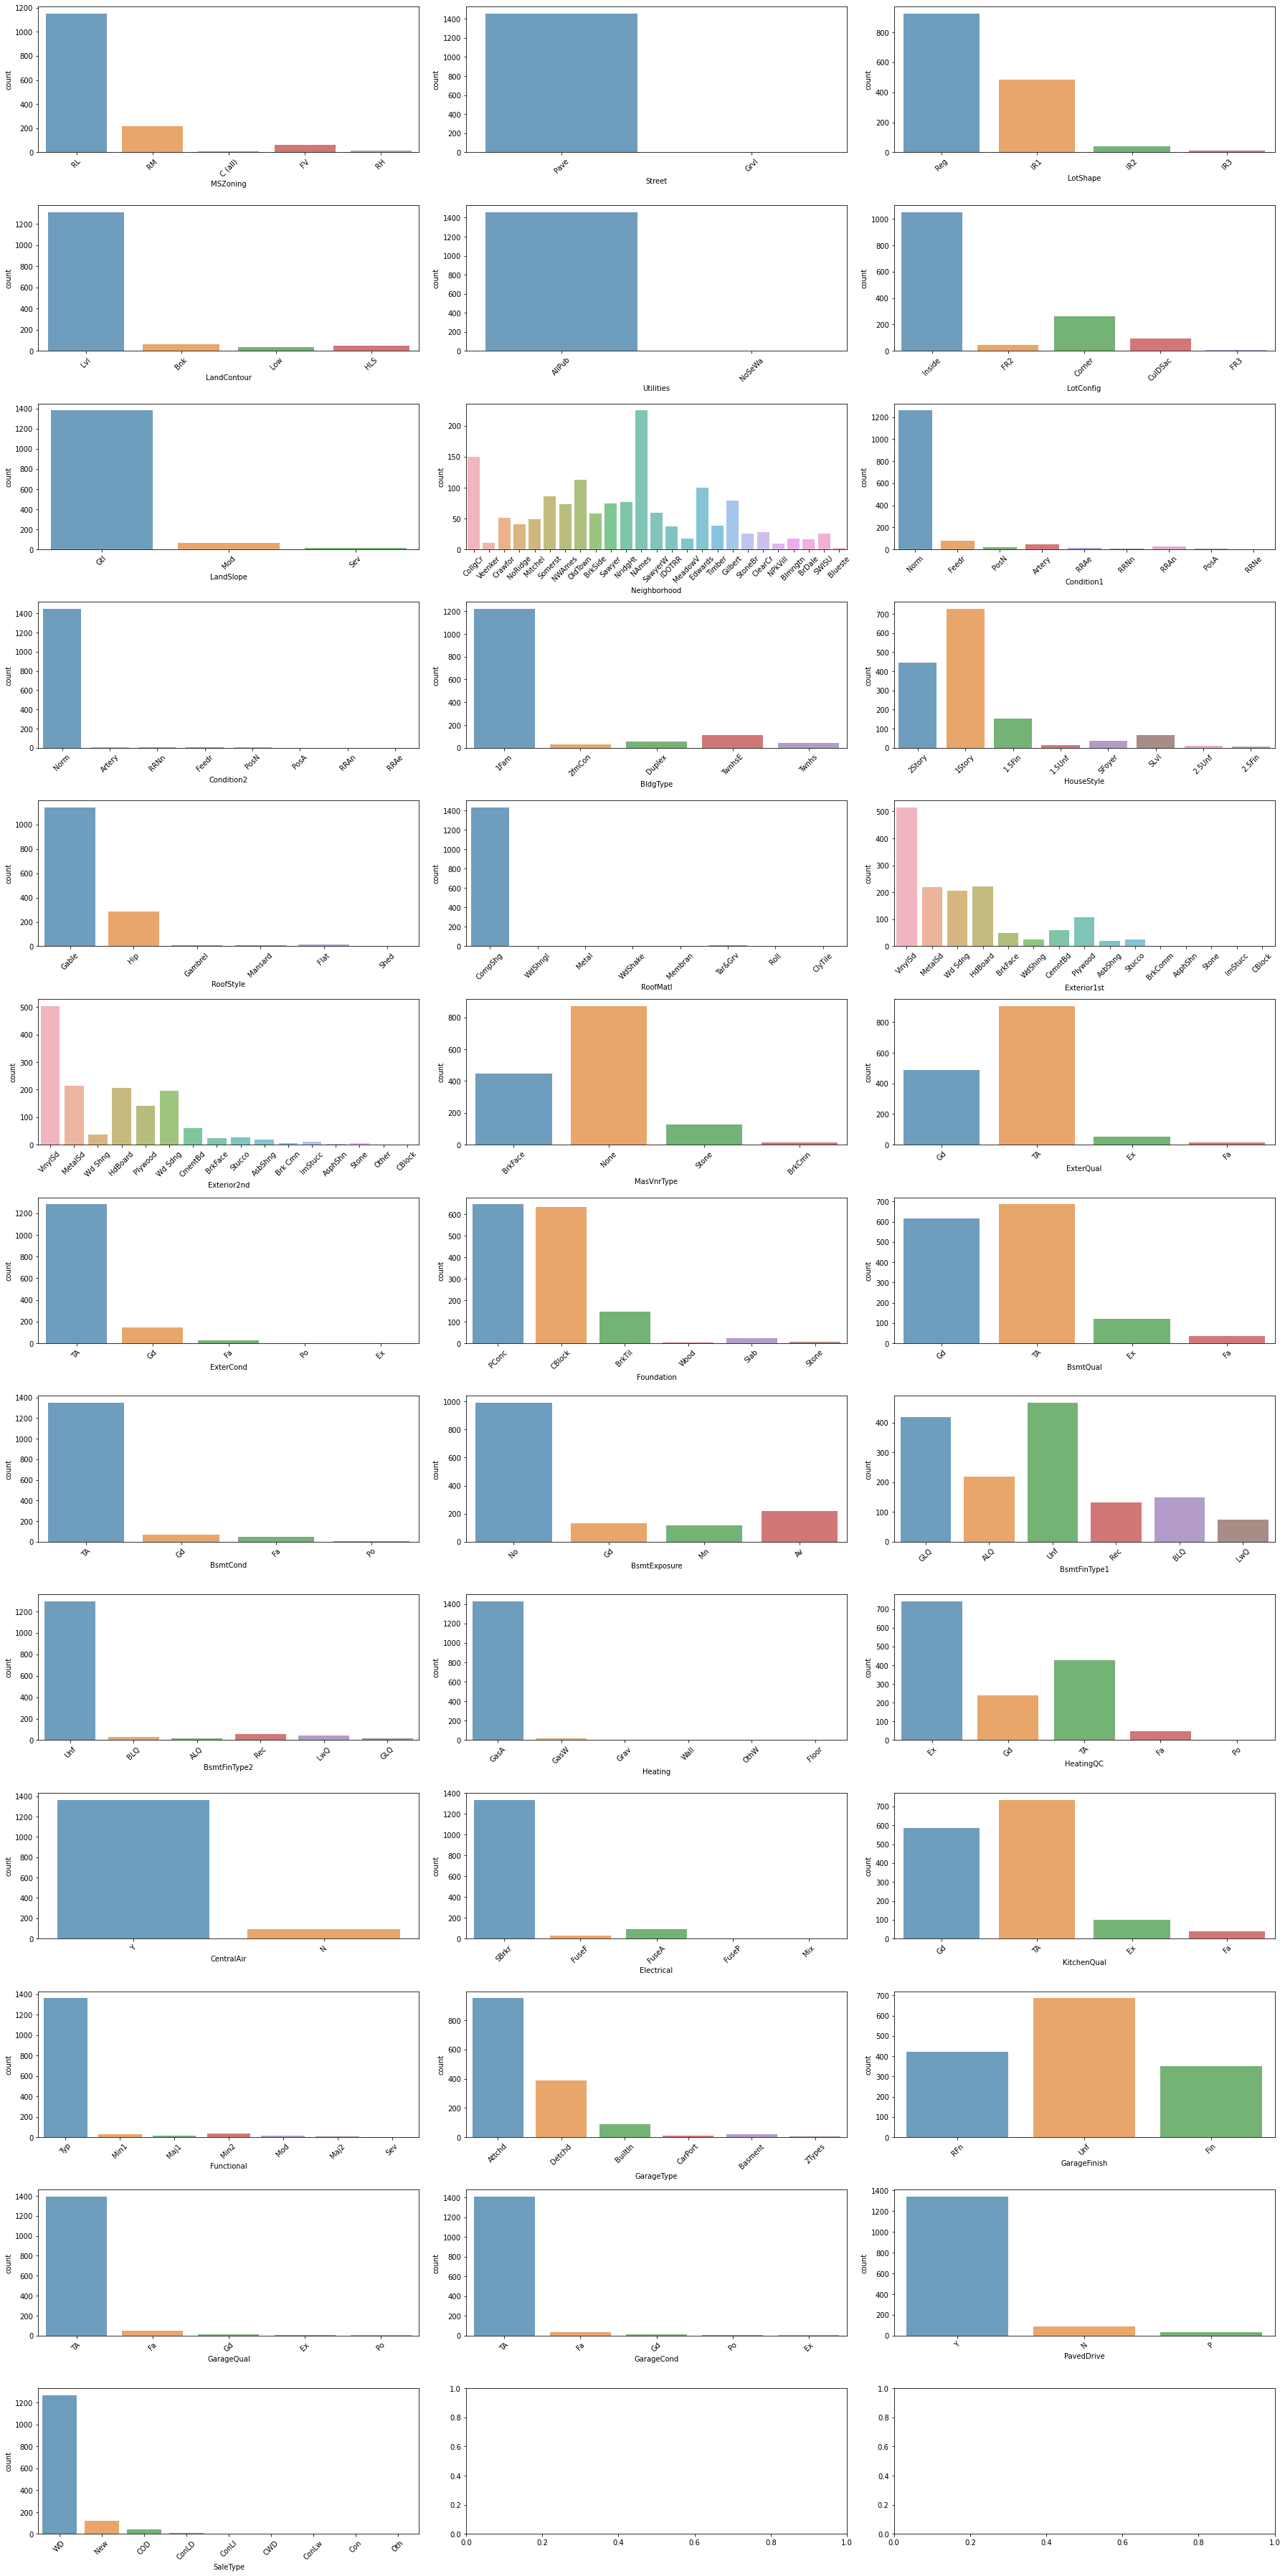

In [ ]:
fig, axes = plt.subplots(
    round(len(categoric.columns) / 3), 3, figsize=(25, 50))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=categoric.columns[i], alpha=0.7, data=categoric, ax=ax)

fig.tight_layout()

Dari visualisasi masing-masing variabel kategorik, terlihat ada beberapa variabel yang tidak memiliki informasi yang cukup untuk dibutuhkan dalam pemodelan regresi nantinya.

Adapun variabel kategorik yang tidak perlu digunakan adalah =  Street,  LandContour, Utilities, LandSlope, Condition2, RoofMatl, ExterCond, BsmtFinType2, Heating, Functional, GarageQual, Garagecond, CentralAir, PavedDrive, SaleType, MiscFeature.

Oleh karena itu, kolom-kolom tersebut di-drop dari df_train

In [ ]:
categoric = categoric.drop(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtFinType2', 'Heating', 'Functional', 
                            'GarageQual', 'GarageCond', 'CentralAir', 'PavedDrive', 'SaleType'], axis=1)
categoric.head()

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,SaleCondition
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,TA,No,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,TA,Gd,ALQ,Ex,SBrkr,TA,Attchd,RFn,Normal
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,TA,Mn,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,Gd,No,ALQ,Gd,SBrkr,Gd,Detchd,Unf,Abnorml
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,TA,Av,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal


In [ ]:
numeric.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


In [ ]:
# Gabungkan numeric dan categoric menjadi dataframe yang siap untuk di-training

train_ready = pd.concat([categoric, numeric], axis = 1)
train_ready

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,SaleCondition,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,TA,No,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal,208500,7,1710,2,548,856,856,2,8,2003,2003
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,TA,Gd,ALQ,Ex,SBrkr,TA,Attchd,RFn,Normal,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,TA,Mn,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal,223500,7,1786,2,608,920,920,2,6,2001,2002
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,Gd,No,ALQ,Gd,SBrkr,Gd,Detchd,Unf,Abnorml,140000,7,1717,3,642,756,961,1,7,1915,1970
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,TA,Av,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,PConc,Gd,TA,No,Unf,Ex,SBrkr,TA,Attchd,RFn,Normal,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,RL,Reg,Inside,NWAmes,Norm,1Fam,1Story,Gable,Plywood,Plywood,Stone,TA,CBlock,Gd,TA,No,ALQ,TA,SBrkr,TA,Attchd,Unf,Normal,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,RL,Reg,Inside,Crawfor,Norm,1Fam,2Story,Gable,CemntBd,CmentBd,None,Ex,Stone,TA,Gd,No,GLQ,Ex,SBrkr,Gd,Attchd,RFn,Normal,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,RL,Reg,Inside,NAmes,Norm,1Fam,1Story,Hip,MetalSd,MetalSd,None,TA,CBlock,TA,TA,Mn,GLQ,Gd,FuseA,Gd,Attchd,Unf,Normal,142125,5,1078,1,240,1078,1078,1,5,1950,1996


**For Test Dataframe (df_test)**

Karena pemilihan variabel-variabel untuk linear regression sudah dilakukan dengan df_train dan df_test berguna untuk menguji coba model nantinya, maka pemilihan variabel dari df_test akan mengikuti df_train yang sudah siap untuk dimodelkan (train_ready)

In [ ]:
test_ready = df_test[['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
                      'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
                      'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                      'BsmtFinType1', 'HeatingQC', 'Electrical', 'KitchenQual', 'GarageType',
                      'GarageFinish', 'SaleCondition', 'OverallQual', 'GrLivArea',
                      'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                      'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]

test_ready

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,HeatingQC,Electrical,KitchenQual,GarageType,GarageFinish,SaleCondition,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,RH,Reg,Inside,NAmes,Feedr,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,CBlock,TA,TA,No,Rec,TA,SBrkr,TA,Attchd,Unf,Normal,5,896,1.0,730.0,882.0,896,1,5,1961,1961
1,RL,IR1,Corner,NAmes,Norm,1Fam,1Story,Hip,Wd Sdng,Wd Sdng,BrkFace,TA,CBlock,TA,TA,No,ALQ,TA,SBrkr,Gd,Attchd,Unf,Normal,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958
2,RL,IR1,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,None,TA,PConc,Gd,TA,No,GLQ,Gd,SBrkr,TA,Attchd,Fin,Normal,5,1629,2.0,482.0,928.0,928,2,6,1997,1998
3,RL,IR1,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,TA,PConc,TA,TA,No,GLQ,Ex,SBrkr,Gd,Attchd,Fin,Normal,6,1604,2.0,470.0,926.0,926,2,7,1998,1998
4,RL,IR1,Inside,StoneBr,Norm,TwnhsE,1Story,Gable,HdBoard,HdBoard,None,Gd,PConc,Gd,TA,No,ALQ,Ex,SBrkr,Gd,Attchd,RFn,Normal,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Inside,MeadowV,Norm,Twnhs,2Story,Gable,CemntBd,CmentBd,None,TA,CBlock,TA,TA,No,Unf,Gd,SBrkr,TA,Attchd,Unf,Normal,4,1092,0.0,0.0,546.0,546,1,5,1970,1970
1455,RM,Reg,Inside,MeadowV,Norm,TwnhsE,2Story,Gable,CemntBd,CmentBd,None,TA,CBlock,TA,TA,No,Rec,TA,SBrkr,TA,CarPort,Unf,Abnorml,4,1092,1.0,286.0,546.0,546,1,6,1970,1970
1456,RL,Reg,Inside,Mitchel,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,None,TA,CBlock,TA,TA,No,ALQ,Ex,SBrkr,TA,Detchd,Unf,Abnorml,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996
1457,RL,Reg,Inside,Mitchel,Norm,1Fam,SFoyer,Gable,HdBoard,Wd Shng,None,TA,PConc,Gd,TA,Av,GLQ,TA,SBrkr,TA,Attchd,Unf,Normal,5,970,0.0,0.0,912.0,970,1,6,1992,1992


# **Categorical Data Encoding**

Dalam melakukan encoding data, hal yang terlebih dahulu perlu dilakukan adalah melakukan penggabungan antara dataframe train_ready dengan test_ready. Hal ini bertujuan untuk meminimalisir adanya variabel dummy yang tidak sinkron antara dua dataframe tersebut, mengingat isi dari masing-masing dataframe berbeda.

In [ ]:
traintest = pd.concat([train_ready, test_ready])
traintest.shape

(2919, 34)

In [ ]:
traintest = pd.get_dummies(traintest, drop_first = True)
traintest

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500.0,7,1710,2.0,548.0,856.0,856,2,8,2003,2003,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
1,181500.0,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
2,223500.0,7,1786,2.0,608.0,920.0,920,2,6,2001,2002,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
3,140000.0,7,1717,3.0,642.0,756.0,961,1,7,1915,1970,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
4,250000.0,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# **Regression Model Building**

In [ ]:
x_train = traintest[:len(train_ready)]
x_test = traintest[len(train_ready):]

x_train = x_train.drop('SalePrice', axis=1)
x_test = x_test.drop('SalePrice', axis=1)

In [ ]:
x_train.shape

(1460, 146)

In [ ]:
x_test.shape

(1459, 146)

In [ ]:
y_train = train_ready['SalePrice']

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predict_test =  regressor.predict(x_test)
y_predict_test

array([100002.35382524, 153824.63706806, 171627.77525304, ...,
       146647.80312587,  97950.52376097, 212266.61638243])

In [ ]:
# Intercept

regressor.intercept_

-318913.4178056343

In [ ]:
# Coefficients

coefficients = regressor.coef_

names = x_test.columns
coefficients_df = pd.DataFrame(data = coefficients, 
                              index = names, 
                              columns = ['Coefficient Value'])
print(coefficients_df)

                       Coefficient Value
OverallQual                  9743.988126
GrLivArea                      68.826604
GarageCars                  11409.054163
GarageArea                     -1.468491
TotalBsmtSF                     3.717602
...                                  ...
SaleCondition_AdjLand       13325.940873
SaleCondition_Alloca        12713.100736
SaleCondition_Family        -1153.297922
SaleCondition_Normal         7330.547798
SaleCondition_Partial       15675.335919

[146 rows x 1 columns]


# **Evaluating the Model**

In [ ]:
y_predict_train =  regressor.predict(x_train)
y_predict_train

array([205781.93302593, 213849.97441951, 212519.32437298, ...,
       271875.02827925, 148791.53453261, 126631.57178951])

In [ ]:
comparison = pd.DataFrame({'Actual Price': y_train, 'Predicted Price': y_predict_train})
print(comparison)

      Actual Price  Predicted Price
0           208500    205781.933026
1           181500    213849.974420
2           223500    212519.324373
3           140000    197714.624192
4           250000    305540.140920
...            ...              ...
1455        175000    168922.217837
1456        210000    209187.024388
1457        266500    271875.028279
1458        142125    148791.534533
1459        147500    126631.571790

[1460 rows x 2 columns]


In [ ]:
r2 = r2_score(y_train,y_predict_train)
mae = mean_absolute_error(y_train, y_predict_train)
mse = mean_squared_error(y_train, y_predict_train)
rmse = np.sqrt(mse)

print(f'R Square score: {r2: .2f}')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

R Square score:  0.88
Mean absolute error: 17003.18
Mean squared error: 749489232.08
Root mean squared error: 27376.80


Hasil R Square dari model ini untuk data training-nya adalah 0,88 atau memiliki persentase sebesar 88%. Hal ini menunjukkan bahwa variabel-variabel independen yang terdapat dalam model dapat mempengaruhi variabel 'HousePrice' sebesar 88%, sedangkan 12% sisanya dipengaruhi oleh variabel lain yang tidak terdapat dalam model. Karena nilai R Square berada di atas 80%, maka dapat dikatakan bahwa model yang dibuat sudah cukup baik.

Adapun nilai RMSE dari model ini adalah sebesar 27376.80